# Airbnb EDA & Property Price Prediction

#### Data Collection:

This Dataset was collected from Kaggle.com

- Link: https://www.kaggle.com/stevezhenghp/airbnb-price-prediction

#### Context

- Airbnb claims to be part of the "sharing economy" and disrupting the hotel industry. Airbnb offers travellers a more unique and personalized way of accommodation and experience by allowing property owners to host and lodge guests primarily homestays for vacation rentals, and tourism activities.


#### Content

- 74,111 properties
- 29 variables
- 6 cities in US (New York, San Fransisco, Washington DC, Los Angelis, Chicago, Boston)


#### Content Variables

1.	id
2.	log_price
3.	property_type
4.	room_type
5.	amenities
6.	accommodates
7.	bathrooms
8.	bed_type
9.	cancellation_policy
10.	cleaning_fee
11.	city
12.	description
13.	first_review
14.	host_has_profile_pic
15.	host_identity_verified
16.	host_response_rate
17.	host_since
18.	instant_bookable
19.	last_review
20.	latitude
21.	longitude
22.	name
23.	neighbourhood
24.	number_of_reviews
25.	review_scores_rating
26.	thumbnail_url
27.	zipcode
28.	bedrooms
29.	beds


    



## Importing libs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline

## Loading dataset

In [5]:
#set no limits to number of colums displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [76]:
# Loading dataset and visual display of the first 5 lines of the dataset
airb = pd.read_csv('data/train.csv')
airb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [19]:
# inspect dataset
print(airb.shape)
print(airb.columns)
print(airb.dtypes)

(74111, 29)
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       ob

In [20]:
# Overview of Dataset information and data types
airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

## Data Cleaning

#### List data issues:
1. Drop unwanted variables in the dataset.
2. Identify variables with wrong datatype and convert as appropriate.
3. Identify variables with null values and either drop or asign a valu
4. Identify price outliers.


##### 1. Drop unwanted variables in the dataframe


Inspecting variables

In [402]:
#inspecting amenities 
airb.amenities.unique()

array(['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}',
       '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}',
       '{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}',
       ...,
       '{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free parking on premises",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector",Essentials,Shampoo,Hangers,"Hair dryer","translation missing: en.hosting_amenity_50"}',
       '{TV,Internet,"Wireless Internet

In [408]:
#inspecting description 
airb.description.unique()

array(['Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.',
       "Enjoy travelling during your stay in Manhattan. My place is centrally located near Times Square and Central Park with easy access to main subways as well as walking distance to many popular restaurants and bus tours. My place is close to the subway, Totto Ramen, Hell's Kitchen, Ippudo Westside, Empanada Mama, Intrepid Sea, Air & Space Museum. My place has three true bedrooms and one bathroom. The kitchen is stocked with stainless steel appliances like the Keurig machine. The living room is spacious and can accommodate another person thanks to the pull out bed. My place is centrally located to some of the top attractions in the city. Feel free to explore the entire apartment and do not worry about sharing the space with any strangers. This is all yours during y

In [410]:
#inspecting description 
airb.thumbnail_url.unique()

array(['https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small',
       ...,
       'https://a0.muscache.com/im/pictures/7fbe448c-5293-4a22-a83e-54c8bc1bbf0d.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/b3971b63-06d9-4417-86ca-e6b40c22edca.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/22968537/da0156bc_original.jpg?aki_policy=small'],
      dtype=object)

In [420]:
#inspecting first review date
airb.first_review.unique()

array(['2016-06-18', '2017-08-05', '2017-04-30', ..., '2012-10-23',
       '2011-06-07', '2010-12-01'], dtype=object)

In [421]:
#inspecting last review date
airb.last_review.unique

<bound method Series.unique of 0        2016-07-18
1        2017-09-23
2        2017-09-14
3               NaN
4        2017-01-22
            ...    
74106           NaN
74107    2017-04-15
74108    2017-09-10
74109           NaN
74110    2017-04-30
Name: last_review, Length: 74111, dtype: object>

In [423]:
#inspecting last review date
airb.id.unique

<bound method Series.unique of 0         6901257
1         6304928
2         7919400
3        13418779
4         3808709
           ...   
74106    14549287
74107    13281809
74108    18688039
74109    17045948
74110     3534845
Name: id, Length: 74111, dtype: int64>

Dropping variables

In [77]:
#drop amenities, description, thumbnail url,last review, first review and id
airb.drop(['amenities','description','thumbnail_url','last_review','first_review','id'], axis=1, inplace= True)

In [10]:
print(airb.shape)
print(airb.columns)

(74111, 23)
Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds'],
      dtype='object')


-In Summary;
The 6 variables (amenities, description, thumbnail_url, last_review, first_review and id) has been removed from the 29 initial total to remain 23. These variables were dropped beacause they would not be a determinant for the project.

##### 2. Identify columns with wrong datatype and convert as appropriate.



Converting zipcode to numeric

In [414]:
#inspecting zipcode 
airb.zipcode.unique()

array(['11201', '10019', '10027', '94117.0', '20009', '94131', '90292',
       '90015', '94121', '91748', '10009.0', '90254', '90277', '90804',
       '60622', '02127', '10002', '11226.0', '91401', '11212.0',
       '11411.0', nan, '11374', '90028', '10016', '11225', '90036',
       '90291', '90046', '90026', '11212', '94118', '11211.0', '10003.0',
       '60605', '90068', '90057', '10021', '20037', '11237', '11233',
       '60608', '10001.0', '94127', '91403', '11249.0', '10037', '10011',
       '10011.0', '10032', '91106', '94107', '20018', '90027', '91601',
       '20001', '10022', '91201', '11226', '90013', '11217', '91016',
       '10031', '10014', '11101', '94110', '94134', '91501', '10029.0',
       '90230', '90039', '11221', '20019', '60647', '20020', '10025',
       '10013', '10040', '91604', '94117', '10039', '10038', '60614',
       '10003', '20002', '11219', '11222', '90042', '94114', '20008',
       '11238', '20007', '11206', '91208', '11223', '02130', '02114',
       '941

In [78]:
#converting the zipcode from object datatype to numeric and  non-numeric as NaN
airb["zipcode"] = pd.to_numeric(airb.zipcode, errors='coerce')


Converting host response rate to numeric

In [23]:
#inspecting host response rate
airb.host_response_rate.unique()

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [79]:
#removing the last character '%' in host response rate
airb['host_response_rate'] = airb['host_response_rate'].map(lambda x: str(x)[:-1])


In [80]:
#converting host response rate to numberic and leave non numric as NaN
airb["host_response_rate"] = pd.to_numeric(airb.host_response_rate, errors='coerce')


Converting host start date from object to date datatype

In [422]:
#inspecting host start date
airb.host_since.unique()

array(['2012-03-26', '2017-06-19', '2016-10-25', ..., '2008-03-03',
       '2010-04-30', '2009-08-23'], dtype=object)

In [81]:
#Converting Date column from object to datetime
airb['host_since'] = pd.to_datetime(airb['host_since'], format='%Y/%m/%d') 



##### 2. Identify columns null values and either drop or asign a value.


Identify columns with null values

In [436]:
#insppecting null by suming number of null values in each column
airb.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     987
bedrooms                     91
beds                        131
dtype: int64

10 columns bathrooms, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, neighbourhood, review_score_rating, bedrooms, beds and zipcode are with null values

In [82]:
#inspecting bathrooms
airb.bathrooms.unique()

array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

In [84]:
airb.bathrooms.unique()

array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

In [85]:
#finding the mean of bathrooms
mean_bathrooms = airb.bathrooms.mean()

print(mean_bathrooms)

1.235262680791763


In [86]:
#replacing the nan values in bathrooms with 1 (mean of bathrooms)
airb.bathrooms.fillna(value=1, inplace=True)

In [450]:
#inspecting host profile pic
airb.host_has_profile_pic.value_counts()

t    73697
f      226
Name: host_has_profile_pic, dtype: int64

In [451]:
#replacing the nan values in bathrooms with 'f'. If the profile picture is nan we'll assume that the host has no profile picture.
airb.host_has_profile_pic.fillna(value='f', inplace=True)

In [453]:
#inspecting host profile pic
airb.host_identity_verified.value_counts()

t    49748
f    24175
Name: host_identity_verified, dtype: int64

In [87]:
#replacing the nan values in bathrooms with 'f'. If the profile picture is nan we'll assume that the host has no profile picture.
airb.host_has_profile_pic.fillna(value='f', inplace=True)

In [88]:
#finding the mean of bathrooms
mean_host_resp = airb.host_response_rate.mean()

print(mean_host_resp)

94.35196731885615


In [89]:
#replacing the nan values in host_response_rate with 94 (mean of host_response_rate)
airb.host_response_rate.fillna(value=94, inplace=True)

In [466]:
#inspecting host response rate
airb.host_response_rate.unique()

array([ 94., 100.,  71.,  68.,  67.,  83.,  50.,  90.,  86.,  92.,  82.,
        80.,  89.,  93.,  99.,   0.,  88.,  96.,  70.,  91.,  25.,  95.,
        98.,  62.,  29.,  33.,  81.,  63.,  38.,  60.,  79.,  78.,  75.,
        65.,  97.,  87.,  40.,  54.,  53.,  58.,  76.,  30.,  64.,  17.,
        20.,  77.,  73.,  41.,  59.,  57.,  85.,  56.,  42.,  44.,  35.,
        14.,  74.,  27.,  10.,  84.,   6.,  72.,  36.,  55.,  43.,  13.,
        39.,  46.,  26.,  61.,  52.,  23.,  22.,  69.,  66.,  15.,  11.,
        31.,  21.,  47.])

In [91]:
#replacing the nan values in host identity verified with 'f'. If the profile picture is nan we'll assume that the host has no profile picture.
airb.host_identity_verified.fillna(value='f', inplace=True)

In [90]:
#replacing the nan values in neighbourhood with 'unknown'. If the profile picture is nan we'll assume that the host has no profile picture.
airb.neighbourhood.fillna(value='unknown', inplace=True)

In [470]:
#finding the mean of review score rating
mean_review_scores_rating = airb.review_scores_rating.mean()

print(mean_review_scores_rating)

94.06736482601195


In [92]:
#replacing the null values in host_response_rate with 94 (mean of review score rating)
airb.review_scores_rating.fillna(value=94, inplace=True)

In [93]:
#inspecting null values
airb.isnull().sum()

log_price                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
host_has_profile_pic        0
host_identity_verified      0
host_response_rate          0
host_since                188
instant_bookable            0
latitude                    0
longitude                   0
name                        0
neighbourhood               0
number_of_reviews           0
review_scores_rating        0
zipcode                   987
bedrooms                   91
beds                      131
dtype: int64

In [94]:
#dropping rows with null values
airb.dropna(axis=0, inplace= True)

In [95]:
#cheching all null values has been dropped
airb.isnull().sum()

log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

## Epxloratory Data Analyis and Visualisation

What is most listed property type?

In [504]:
#inspecting property type
airb.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Boutique hotel', 'Villa', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'],
      dtype=object)

In [507]:
property_type = airb['property_type'].value_counts()

property_type10 = property_type.head(10)

property_type10

Apartment          48030
House              16270
Condominium         2621
Townhouse           1661
Loft                1217
Other                597
Guesthouse           490
Bed & Breakfast      456
Bungalow             360
Villa                177
Name: property_type, dtype: int64

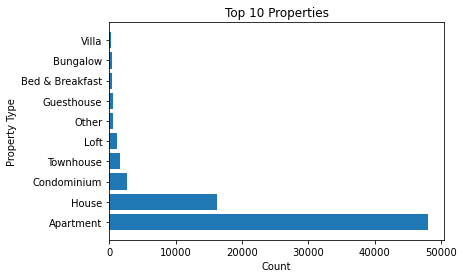

In [508]:
# compute and plot most popular property_type

plt.figure()
plt.barh(property_type10.index, property_type10.values)
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.title('Top 10 Properties')
plt.show()

What is the percentage of property listed per city?

In [509]:
#inspecting city
airb.city.unique()

array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

In [96]:
city = airb.city.value_counts()
city

NYC        31633
LA         22083
SF          6337
DC          5593
Chicago     3675
Boston      3437
Name: city, dtype: int64

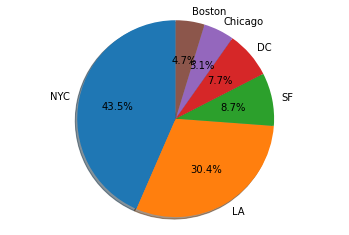

In [97]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = city.index
values = city.values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

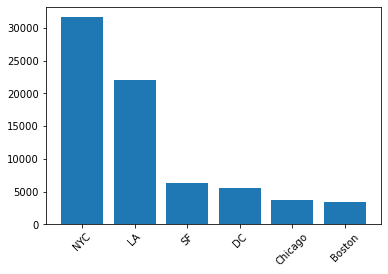

In [565]:
plt.figure()
plt.bar(airb['city'].value_counts().index, airb['city'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

What is the count per bed type?

In [552]:
airb.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,94.0,2012-03-26,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100.0,2017-06-19,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100.0,2016-10-25,t,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,94.0,2015-04-19,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,94.0,94117.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100.0,2015-03-01,t,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009.0,0.0,1.0


In [568]:
neighbourhood = airb['neighbourhood'].value_counts()

neighbourhood10 = neighbourhood.head(10)

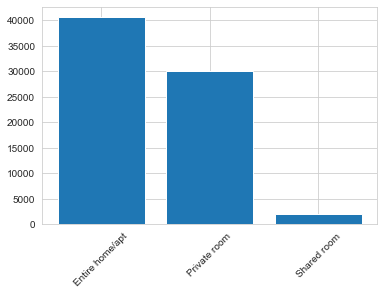

In [587]:
plt.figure()
plt.bar(airb['room_type'].value_counts().index, airb['room_type'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

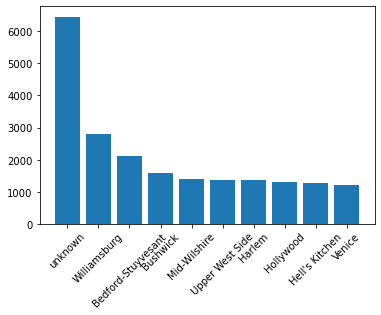

In [569]:
plt.figure()
plt.bar(neighbourhood10.index, neighbourhood10.values)
plt.xticks(rotation=45)
plt.show()

In [573]:
grouped_city = airb.groupby('city')

grouped_city['review_scores_rating'].agg(mean)

city
Boston     93.667443
Chicago    94.948571
DC         94.583050
LA         94.229407
NYC        93.620302
SF         94.805586
Name: review_scores_rating, dtype: float64

In [575]:
grouped_city['log_price'].agg(mean)

city
Boston     4.884940
Chicago    4.620276
DC         4.987281
LA         4.720413
NYC        4.718905
SF         5.169251
Name: log_price, dtype: float64

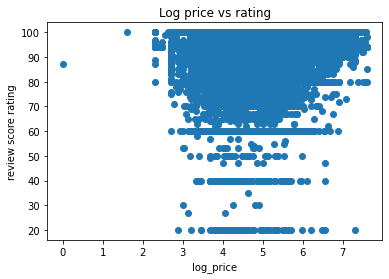

In [576]:
plt.figure()
plt.scatter(airb['log_price'], airb['review_scores_rating'])
plt.xlabel('log_price')
plt.ylabel('review score rating')
plt.title('Log price vs rating')
plt.show()

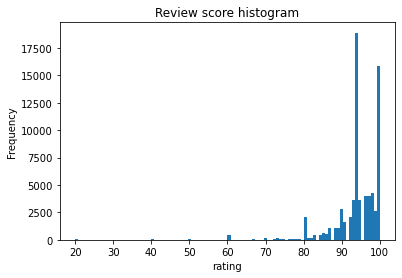

In [555]:
plt.figure()
plt.hist(airb['review_scores_rating'], bins=100)
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Review score histogram')
plt.show()

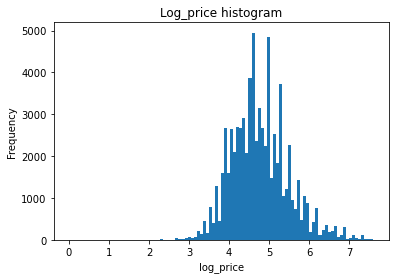

In [556]:
plt.figure()
plt.hist(airb['log_price'], bins=100)
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.title('Log_price histogram')
plt.show()

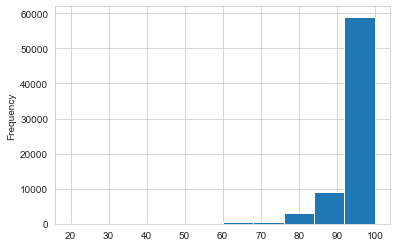

In [582]:
fig, ax = plt.subplots()

airb['review_scores_rating'].plot.hist();

<AxesSubplot:>

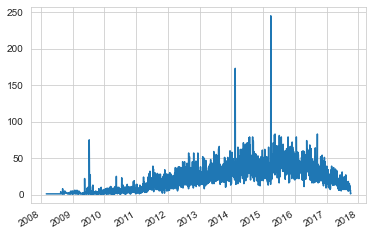

In [583]:
fig, ax = plt.subplots()

airb.host_since.value_counts().plot(ax=ax)

In [561]:

airb.host_since.dt.year.value_counts()

2015    15374
2014    13507
2016    12930
2013    10569
2012     8167
2017     4861
2011     4840
2010     1742
2009      677
2008       91
Name: host_since, dtype: int64

<AxesSubplot:>

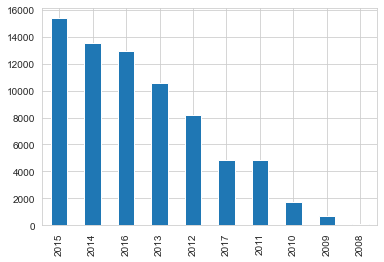

In [585]:
fig, ax = plt.subplots()

years =  airb['host_since'].dt.year
years.value_counts().plot.bar()

In [98]:
import seaborn as sns

sns.set_style('whitegrid')

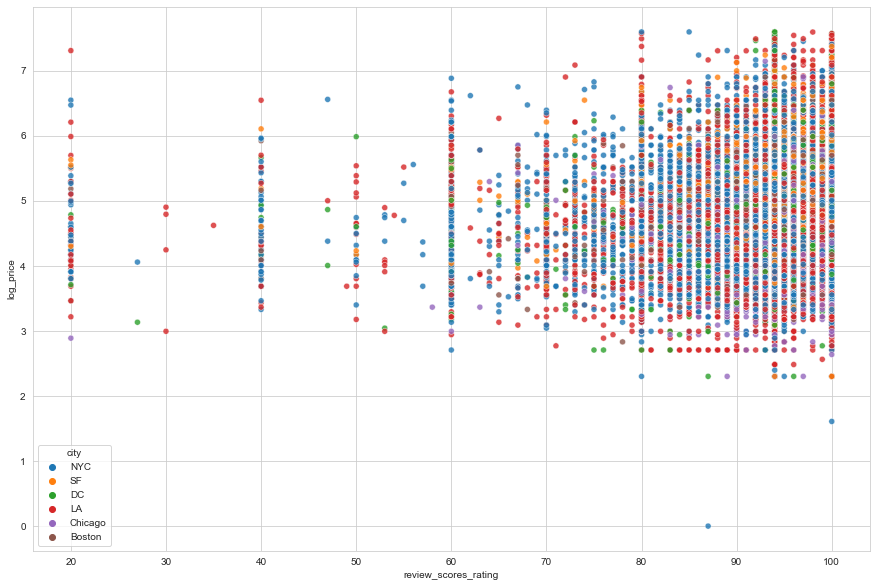

In [100]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=airb, x='review_scores_rating', y='log_price', hue='city', alpha=0.8)  
plt.show()
# lowering alpha makes points slightly more transparent

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


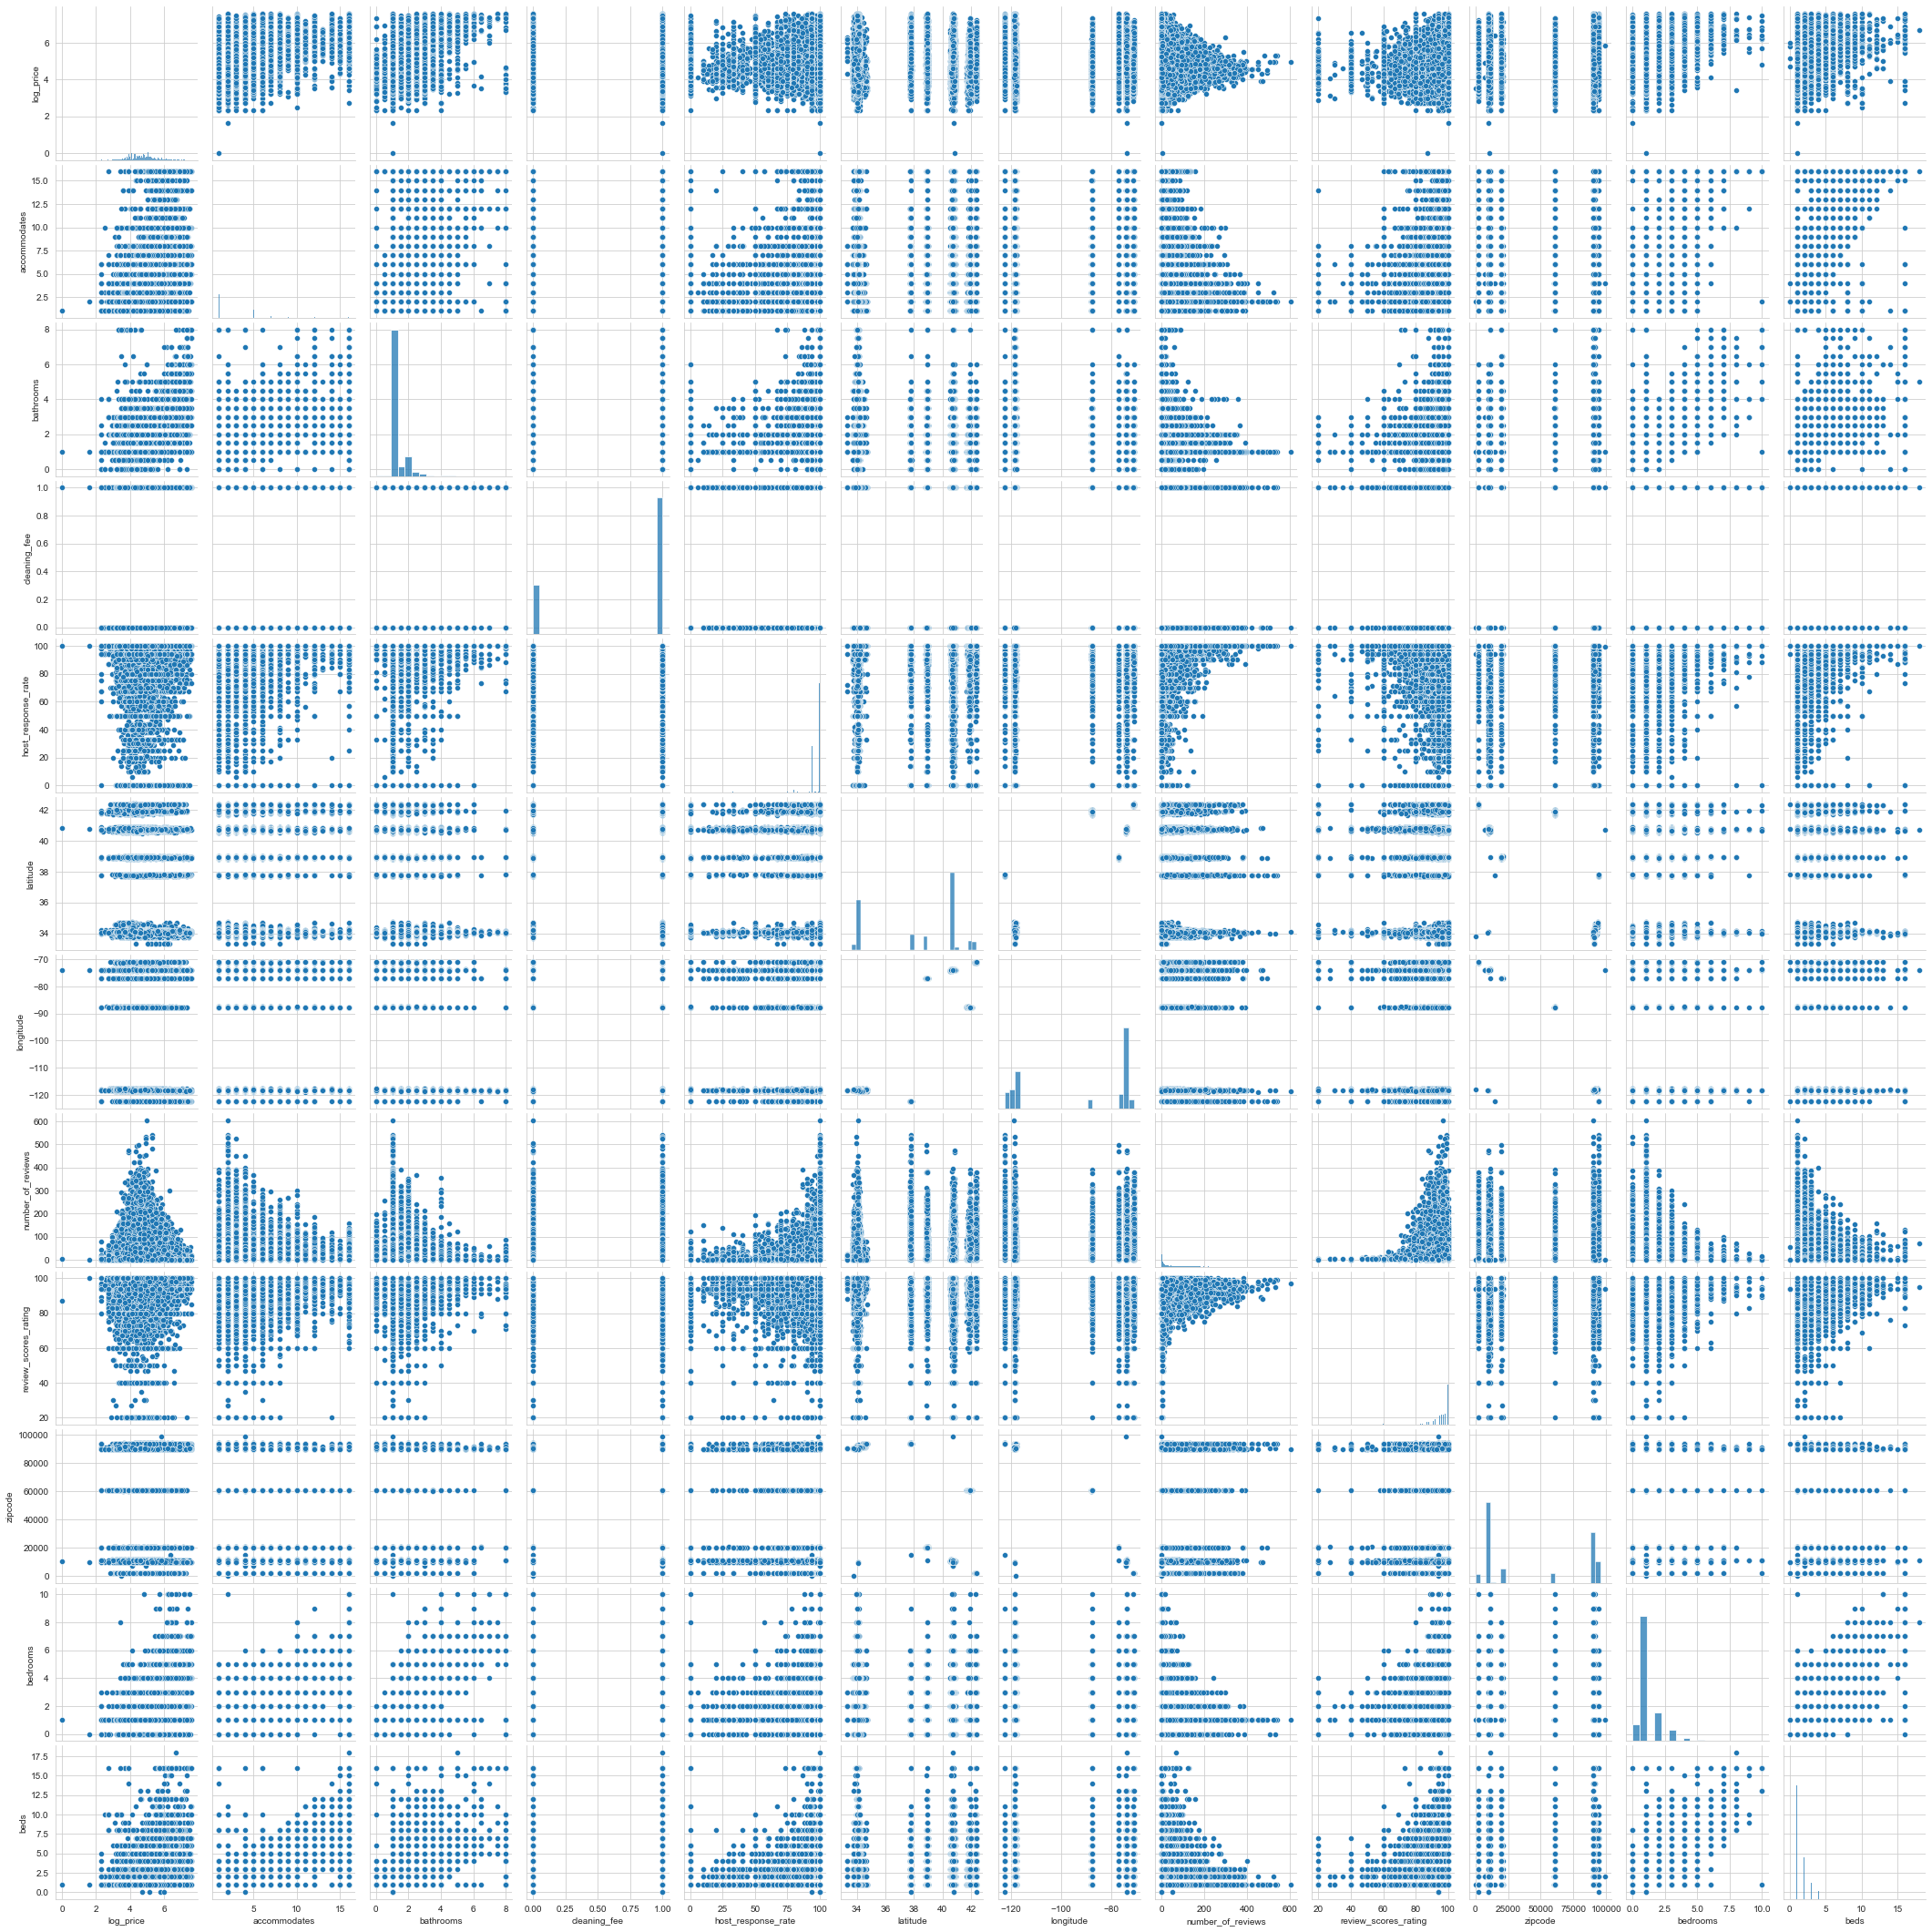

In [581]:
sns.pairplot(airb)

## Predicting Log_price 

Model 1

In [101]:
airb_m1 = airb[['log_price','zipcode','host_has_profile_pic','property_type','city','room_type','bathrooms','bedrooms','beds','instant_bookable','accommodates','bed_type','host_identity_verified']].copy()

airb_m1.head()

,log_price,zipcode,host_has_profile_pic,property_type,city,room_type,bathrooms,bedrooms,beds,instant_bookable,accommodates,bed_type,host_identity_verified
0,5.010635,11201.0,t,Apartment,NYC,Entire home/apt,1.0,1.0,1.0,f,3,Real Bed,t
1,5.129899,10019.0,t,Apartment,NYC,Entire home/apt,1.0,3.0,3.0,t,7,Real Bed,f
2,4.976734,10027.0,t,Apartment,NYC,Entire home/apt,1.0,1.0,3.0,t,5,Real Bed,t
3,6.620073,94117.0,t,House,SF,Entire home/apt,1.0,2.0,2.0,f,4,Real Bed,t
4,4.744932,20009.0,t,Apartment,DC,Entire home/apt,1.0,0.0,1.0,t,2,Real Bed,t


In [102]:
X = pd.get_dummies(airb_m1.loc[:, airb_m1.columns != 'log_price'])
y = airb_m1['log_price']

In [103]:
X.head()

,zipcode,bathrooms,bedrooms,beds,accommodates,host_has_profile_pic_f,host_has_profile_pic_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_identity_verified_f,host_identity_verified_t
0,11201.0,1.0,1.0,1.0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
1,10019.0,1.0,3.0,3.0,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0
2,10027.0,1.0,1.0,3.0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
3,94117.0,1.0,2.0,2.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
4,20009.0,1.0,0.0,1.0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #instantiating the model

In [106]:
model

LinearRegression()

In [107]:
model.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)

In [109]:
model.score(X_test, y_test)

0.4961395019569037

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :0.25923220043438333
MAE is :0.3488617320951038
r2 is :0.4961395019569037


Model 2

In [111]:
airb_m2 = airb[['log_price','zipcode','host_response_rate','host_has_profile_pic','review_scores_rating','property_type','city','room_type','bathrooms','bedrooms','beds','instant_bookable','accommodates','bed_type','latitude','longitude','host_identity_verified']].copy()

airb_m2.head()

,log_price,zipcode,host_response_rate,host_has_profile_pic,review_scores_rating,property_type,city,room_type,bathrooms,bedrooms,beds,instant_bookable,accommodates,bed_type,latitude,longitude,host_identity_verified
0,5.010635,11201.0,94.0,t,100.0,Apartment,NYC,Entire home/apt,1.0,1.0,1.0,f,3,Real Bed,40.696524,-73.991617,t
1,5.129899,10019.0,100.0,t,93.0,Apartment,NYC,Entire home/apt,1.0,3.0,3.0,t,7,Real Bed,40.766115,-73.989040,f
2,4.976734,10027.0,100.0,t,92.0,Apartment,NYC,Entire home/apt,1.0,1.0,3.0,t,5,Real Bed,40.808110,-73.943756,t
3,6.620073,94117.0,94.0,t,94.0,House,SF,Entire home/apt,1.0,2.0,2.0,f,4,Real Bed,37.772004,-122.431619,t
4,4.744932,20009.0,100.0,t,40.0,Apartment,DC,Entire home/apt,1.0,0.0,1.0,t,2,Real Bed,38.925627,-77.034596,t


In [112]:
X = pd.get_dummies(airb_m1.loc[:, airb_m1.columns != 'log_price'])
y = airb_m1['log_price']

In [113]:
X.head()

,zipcode,bathrooms,bedrooms,beds,accommodates,host_has_profile_pic_f,host_has_profile_pic_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_identity_verified_f,host_identity_verified_t
0,11201.0,1.0,1.0,1.0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
1,10019.0,1.0,3.0,3.0,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0
2,10027.0,1.0,1.0,3.0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
3,94117.0,1.0,2.0,2.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
4,20009.0,1.0,0.0,1.0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #instantiating the model

In [116]:
model

LinearRegression()

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

In [119]:
model.score(X_test, y_test)

0.4961395019569037

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :0.25923220043438333
MAE is :0.3488617320951038
r2 is :0.4961395019569037


Model 2

In [121]:
airb_m2 = airb[['log_price','property_type','room_type','bathrooms','bedrooms','beds','instant_bookable','accommodates','bed_type']].copy()

airb_m2.head()

,log_price,property_type,room_type,bathrooms,bedrooms,beds,instant_bookable,accommodates,bed_type
0,5.010635,Apartment,Entire home/apt,1.0,1.0,1.0,f,3,Real Bed
1,5.129899,Apartment,Entire home/apt,1.0,3.0,3.0,t,7,Real Bed
2,4.976734,Apartment,Entire home/apt,1.0,1.0,3.0,t,5,Real Bed
3,6.620073,House,Entire home/apt,1.0,2.0,2.0,f,4,Real Bed
4,4.744932,Apartment,Entire home/apt,1.0,0.0,1.0,t,2,Real Bed


In [122]:
X.head()

,zipcode,bathrooms,bedrooms,beds,accommodates,host_has_profile_pic_f,host_has_profile_pic_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_identity_verified_f,host_identity_verified_t
0,11201.0,1.0,1.0,1.0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
1,10019.0,1.0,3.0,3.0,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0
2,10027.0,1.0,1.0,3.0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
3,94117.0,1.0,2.0,2.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
4,20009.0,1.0,0.0,1.0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [123]:
X = pd.get_dummies(airb_m2.loc[:, airb_m2.columns != 'log_price'])
y = airb_m2['log_price']

In [124]:
X.head()

,bathrooms,bedrooms,beds,accommodates,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1.0,1.0,1.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1.0,3.0,3.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1.0,1.0,3.0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1.0,2.0,2.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,1.0,0.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [126]:
model = LinearRegression() #instantiating the model

In [127]:
model

LinearRegression()

In [128]:
model.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred = model.predict(X_test)

In [130]:
model.score(X_test, y_test)

0.5182381657423125

In [131]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :0.2481535086447143
MAE is :0.37685499888497054
r2 is :0.5182381657423125


Model 3

In [132]:
airb_m3 = airb[['log_price','property_type','room_type','bedrooms','beds','accommodates','bed_type']].copy()

airb_m3.head()

,log_price,property_type,room_type,bedrooms,beds,accommodates,bed_type
0,5.010635,Apartment,Entire home/apt,1.0,1.0,3,Real Bed
1,5.129899,Apartment,Entire home/apt,3.0,3.0,7,Real Bed
2,4.976734,Apartment,Entire home/apt,1.0,3.0,5,Real Bed
3,6.620073,House,Entire home/apt,2.0,2.0,4,Real Bed
4,4.744932,Apartment,Entire home/apt,0.0,1.0,2,Real Bed


In [133]:
X = pd.get_dummies(airb_m3.loc[:, airb_m3.columns != 'log_price'])
y = airb_m3['log_price']

In [134]:
X.head()

,bedrooms,beds,accommodates,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1.0,1.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,3.0,3.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1.0,3.0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,2.0,2.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [136]:
model = LinearRegression() #instantiating the model

In [137]:
model

LinearRegression()

In [138]:
model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = model.predict(X_test)

In [140]:
model.score(X_test, y_test)

0.506861486241603

In [141]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :0.2540135887383927
MAE is :0.38097582335997654
r2 is :0.506861486241603


Model 4

In [142]:
airb_m4 = airb[['log_price','city','accommodates','latitude','longitude']].copy()

airb_m4.head()

,log_price,city,accommodates,latitude,longitude
0,5.010635,NYC,3,40.696524,-73.991617
1,5.129899,NYC,7,40.766115,-73.989040
2,4.976734,NYC,5,40.808110,-73.943756
3,6.620073,SF,4,37.772004,-122.431619
4,4.744932,DC,2,38.925627,-77.034596


In [143]:
X = pd.get_dummies(airb_m4.loc[:, airb_m4.columns != 'log_price'])
y = airb_m4['log_price']

In [144]:
X.head()

,accommodates,latitude,longitude,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,3,40.696524,-73.991617,0,0,0,0,1,0
1,7,40.766115,-73.989040,0,0,0,0,1,0
2,5,40.808110,-73.943756,0,0,0,0,1,0
3,4,37.772004,-122.431619,0,0,0,0,0,1
4,2,38.925627,-77.034596,0,0,1,0,0,0


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [146]:
model = LinearRegression() #instantiating the model

In [147]:
model

LinearRegression()

In [148]:
model.fit(X_train, y_train)

LinearRegression()

In [149]:
y_pred = model.predict(X_test)

In [150]:
model.score(X_test, y_test)

0.3952514874142635

In [152]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :0.3115034329713054
MAE is :0.42407486472259254
r2 is :0.3952514874142635


Model 5

In [153]:
airb_m5 = airb[['log_price','accommodates','bed_type','latitude','longitude']].copy()

airb_m5.head()

,log_price,accommodates,bed_type,latitude,longitude
0,5.010635,3,Real Bed,40.696524,-73.991617
1,5.129899,7,Real Bed,40.766115,-73.989040
2,4.976734,5,Real Bed,40.808110,-73.943756
3,6.620073,4,Real Bed,37.772004,-122.431619
4,4.744932,2,Real Bed,38.925627,-77.034596


In [154]:
X = pd.get_dummies(airb_m4.loc[:, airb_m4.columns != 'log_price'])
y = airb_m4['log_price']

In [155]:
X.head()

,accommodates,latitude,longitude,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,3,40.696524,-73.991617,0,0,0,0,1,0
1,7,40.766115,-73.989040,0,0,0,0,1,0
2,5,40.808110,-73.943756,0,0,0,0,1,0
3,4,37.772004,-122.431619,0,0,0,0,0,1
4,2,38.925627,-77.034596,0,0,1,0,0,0


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [157]:
model = LinearRegression() #instantiating the model

In [158]:
model

LinearRegression()

In [159]:
model.fit(X_train, y_train)

LinearRegression()

In [160]:
y_pred = model.predict(X_test)

In [161]:
model.score(X_test, y_test)

0.3952514874142635

In [162]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :0.3115034329713054
MAE is :0.42407486472259254
r2 is :0.3952514874142635


Model 6

In [163]:
airb_m6 = airb[['log_price','zipcode','host_response_rate','host_has_profile_pic','review_scores_rating','property_type','city','room_type','bathrooms','bedrooms','beds','instant_bookable','accommodates','bed_type','latitude','longitude','host_identity_verified']].copy()

airb_m6.head()

,log_price,zipcode,host_response_rate,host_has_profile_pic,review_scores_rating,property_type,city,room_type,bathrooms,bedrooms,beds,instant_bookable,accommodates,bed_type,latitude,longitude,host_identity_verified
0,5.010635,11201.0,94.0,t,100.0,Apartment,NYC,Entire home/apt,1.0,1.0,1.0,f,3,Real Bed,40.696524,-73.991617,t
1,5.129899,10019.0,100.0,t,93.0,Apartment,NYC,Entire home/apt,1.0,3.0,3.0,t,7,Real Bed,40.766115,-73.989040,f
2,4.976734,10027.0,100.0,t,92.0,Apartment,NYC,Entire home/apt,1.0,1.0,3.0,t,5,Real Bed,40.808110,-73.943756,t
3,6.620073,94117.0,94.0,t,94.0,House,SF,Entire home/apt,1.0,2.0,2.0,f,4,Real Bed,37.772004,-122.431619,t
4,4.744932,20009.0,100.0,t,40.0,Apartment,DC,Entire home/apt,1.0,0.0,1.0,t,2,Real Bed,38.925627,-77.034596,t


In [164]:
X = pd.get_dummies(airb_m6.loc[:, airb_m6.columns != 'log_price'])
y = airb_m6['log_price']

In [165]:
X.head()

,zipcode,host_response_rate,review_scores_rating,bathrooms,bedrooms,beds,accommodates,latitude,longitude,host_has_profile_pic_f,host_has_profile_pic_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_identity_verified_f,host_identity_verified_t
0,11201.0,94.0,100.0,1.0,1.0,1.0,3,40.696524,-73.991617,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
1,10019.0,100.0,93.0,1.0,3.0,3.0,7,40.766115,-73.989040,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0
2,10027.0,100.0,92.0,1.0,1.0,3.0,5,40.808110,-73.943756,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
3,94117.0,94.0,94.0,1.0,2.0,2.0,4,37.772004,-122.431619,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
4,20009.0,100.0,40.0,1.0,0.0,1.0,2,38.925627,-77.034596,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

In [167]:
model = LinearRegression() #instantiating the model

In [168]:
model

LinearRegression()

In [169]:
model.fit(X_train, y_train)

LinearRegression()

In [170]:
y_pred = model.predict(X_test)

In [171]:
model.score(X_test, y_test)

0.537082574481285